In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

Mounted at /content/drive


/content/drive/MyDrive/Datasets


In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/TarekDib03/Analytics/master/Week2%20-%20Linear%20Regression/Data/climate_change.csv')

In [ ]:
data

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [11]:
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [12]:
cor=data.corr()
cor

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.000000,-0.025789,-0.145345,0.985379,0.910563,0.994850,0.460965,0.870067,0.022353,-0.361884,0.755731
Month,-0.025789,1.000000,-0.016345,-0.096287,0.017558,0.012395,-0.014914,-0.001084,-0.032754,0.014845,-0.098016
MEI,-0.145345,-0.016345,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
CO2,0.985379,-0.096287,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.748505
CH4,0.910563,0.017558,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
N2O,0.994850,0.012395,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
CFC-11,0.460965,-0.014914,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
CFC-12,0.870067,-0.001084,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
TSI,0.022353,-0.032754,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
Aerosols,-0.361884,0.014845,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069


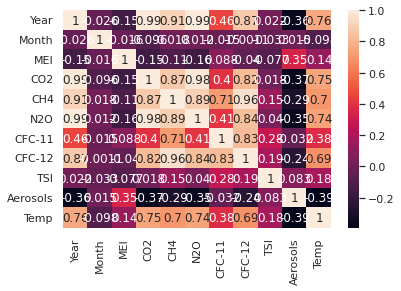

In [13]:
sns.heatmap(cor, annot = True)

In [14]:
data.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

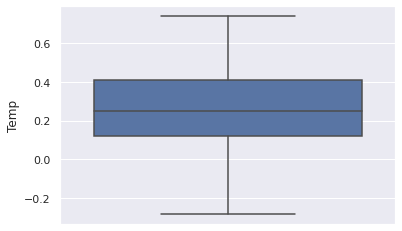

In [ ]:
sns.boxplot(y = data['Temp'])

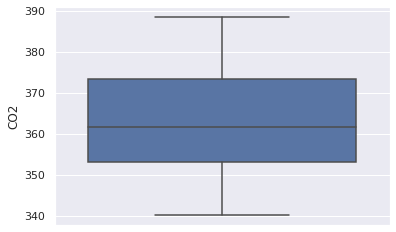

In [15]:
sns.boxplot(y = data['CO2'])

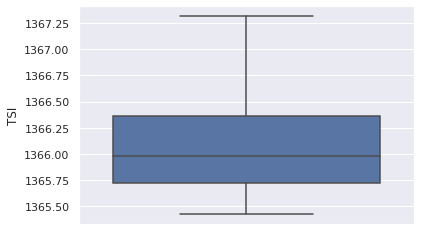

In [16]:
sns.boxplot(y = data['TSI'])

In [17]:
#finding inter quartile range (IQR) to remove outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

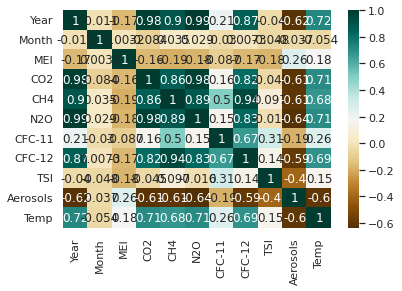

In [18]:
corr1 = data.corr()
sns.heatmap(corr1, cmap='BrBG', annot=True)


In [19]:
x = data[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']]
y = data[['Temp']]

In [20]:
import statsmodels.api as sm
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     69.11
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           2.36e-57
Time:                        04:50:01   Log-Likelihood:                 251.36
No. Observations:                 243   AIC:                            -484.7
Df Residuals:                     234   BIC:                            -453.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -60.8378     23.736     -2.563      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# The variables that have a P-Value less than 0.05 are CFC-12, TSI, Aerosols and MEI

In [21]:
df1 = data[data.iloc[:,0]<=2006]  
df1

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
29,1985,10,-0.140,343.08,1681.56,305.395,215.327,390.676,1365.5269,0.0101,-0.008
30,1985,11,-0.050,344.40,1680.68,305.530,216.282,392.714,1365.6289,0.0097,-0.093
31,1985,12,-0.293,345.82,1677.99,305.653,217.326,394.539,1365.6794,0.0122,-0.002
32,1986,1,-0.307,346.54,1675.82,305.775,218.382,396.082,1365.6746,0.0146,0.121
33,1986,2,-0.191,347.13,1666.83,305.911,219.379,397.345,1365.5475,0.0158,0.065
...,...,...,...,...,...,...,...,...,...,...,...
279,2006,8,0.759,380.45,1762.66,319.930,248.981,539.682,1365.7067,0.0041,0.482
280,2006,9,0.793,378.92,1776.04,320.010,248.775,539.566,1365.8419,0.0043,0.425
281,2006,10,0.892,379.16,1789.02,320.125,248.666,539.488,1365.8270,0.0044,0.472
282,2006,11,1.292,380.18,1791.91,320.321,248.605,539.500,1365.7039,0.0049,0.440


In [22]:
df1.shape

(219, 11)

In [23]:
df2 = data[data.iloc[:,0]>2006]  
df2.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
284,2007,1,0.974,382.93,1799.66,320.561,248.372,539.206,1365.7173,0.0054,0.601
285,2007,2,0.510,383.81,1803.08,320.571,248.264,538.973,1365.7145,0.0051,0.498
286,2007,3,0.074,384.56,1803.10,320.548,247.997,538.811,1365.7544,0.0045,0.435
287,2007,4,-0.049,386.40,1802.11,320.518,247.574,538.586,1365.7228,0.0045,0.466
288,2007,5,0.183,386.58,1795.65,320.445,247.224,538.130,1365.6932,0.0041,0.372


In [24]:
df2.shape

(24, 11)

In [25]:
x = data[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']]
y = data['Temp']

In [26]:
x_train = df1[['MEI','CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']]
y_train = df1['Temp']
x_test = df2[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11',  'CFC-12', 'TSI', 'Aerosols']]
y_test = df2['Temp']
# 'CO2', 'CH4', 'N2O', 'CFC-11',

In [27]:
X2_train = sm.add_constant(x_train)
est_train = sm.OLS(y_train, X2_train)
est2 = est_train.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     68.15
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           3.37e-54
Time:                        04:50:32   Log-Likelihood:                 229.49
No. Observations:                 219   AIC:                            -441.0
Df Residuals:                     210   BIC:                            -410.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -51.0320     24.469     -2.086      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)
  

LinearRegression()

In [29]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -51.031969159858036
Coefficients:


[('MEI', 0.06223569777302381),
 ('CO2', 0.0049606987940408465),
 ('CH4', -0.00038810727802363575),
 ('N2O', 0.0018262419311547184),
 ('CFC-11', -0.0011344993284555694),
 ('CFC-12', 0.0014013277032073551),
 ('TSI', 0.03604734063953119),
 ('Aerosols', -8.435947559286046)]

In [30]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.47395865 0.4503635  0.43347525 0.43430288 0.45407379 0.42558192
 0.4256269  0.40086034 0.34299562 0.34452906 0.34506256 0.3546125
 0.37297068 0.35481019 0.34472978 0.3962589  0.43969896 0.46681556
 0.45350739 0.42400764 0.38408517 0.36584435 0.38171572 0.3874683 ]


In [31]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
284,0.601,0.473959
285,0.498,0.450364
286,0.435,0.433475
287,0.466,0.434303
288,0.372,0.454074


In [32]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 69.69
Mean Absolute Error: 0.07881358260266709
Mean Square Error: 0.01062595645613692
Root Mean Square Error: 0.10308228002977486


In [33]:
r = np.corrcoef(df1['N2O'], df1['MEI'])
print("The correlation coefficient is: " + str(r[1][0]))

The correlation coefficient is: -0.06177124908370091


In [34]:
r = np.corrcoef(df1['N2O'], df1['CO2'])
print("The correlation coefficient is: " + str(r[1][0]))

The correlation coefficient is: 0.9749926361365618


In [35]:
r = np.corrcoef(df1['N2O'], df1['CH4'])
print("The correlation coefficient is: " + str(r[1][0]))

The correlation coefficient is: 0.8903124993701752


In [36]:
r = np.corrcoef(df1['N2O'], df1['N2O'])
print("The correlation coefficient is: " + str(r[1][0]))

The correlation coefficient is: 1.0


In [37]:
r = np.corrcoef(df1['N2O'], df1['CFC-11'])
print("The correlation coefficient is: " + str(r[1][0]))

The correlation coefficient is: 0.3273891567210462


In [38]:
r = np.corrcoef(df1['N2O'], df1['CFC-12'])
print("The correlation coefficient is: " + str(r[1][0]))

The correlation coefficient is: 0.8645200386566597


In [39]:
r = np.corrcoef(df1['N2O'], df1['TSI'])
print("The correlation coefficient is: " + str(r[1][0]))

The correlation coefficient is: 0.15958759016062263


In [40]:
r = np.corrcoef(df1['N2O'], df1['Aerosols'])
print("The correlation coefficient is: " + str(r[1][0]))

The correlation coefficient is: -0.6609381809526801


N2O is correlated with CO2, CH4, CFC-12 since their correlation coefficient is greater than 0.7

In [41]:
r = np.corrcoef(df1['CFC-11'], df1['MEI'])
print("The correlation coefficient is: " + str(r[1][0]))

The correlation coefficient is: -0.16610201966431865


In [42]:
r = np.corrcoef(df1['CFC-11'], df1['CO2'])
print("The correlation coefficient is: " + str(r[1][0]))

The correlation coefficient is: 0.34154482148525867


In [43]:
r = np.corrcoef(df1['CFC-11'], df1['CH4'])
print("The correlation coefficient is: " + str(r[1][0]))

The correlation coefficient is: 0.627913787898016


In [44]:
r = np.corrcoef(df1['CFC-11'], df1['N2O'])
print("The correlation coefficient is: " + str(r[1][0]))

The correlation coefficient is: 0.3273891567210462


In [45]:
r = np.corrcoef(df1['CFC-11'], df1['CFC-12'])
print("The correlation coefficient is: " + str(r[1][0]))

The correlation coefficient is: 0.7493680735584559


In [46]:
r = np.corrcoef(df1['CFC-11'], df1['TSI'])
print("The correlation coefficient is: " + str(r[1][0]))

The correlation coefficient is: 0.2571940874708528


In [47]:
r = np.corrcoef(df1['CFC-11'], df1['Aerosols'])
print("The correlation coefficient is: " + str(r[1][0]))

The correlation coefficient is: -0.23054354377641395


CFC-11 is corelated with CFC-12 since their correlation coefficient is greater than 0.7

Question.

Current scientific opinion is that nitrous oxide and CFC-11 are greenhouse gases: gases that are able to trap heat from the sun and contribute to the heating of the Earth. However, the regression coefficients of both the N2O and CFC-11 variables are negative, indicating that increasing atmospheric concentrations of either of these two compounds is associated with lower global temperatures.

Which of the following is the simplest correct explanation for this contradiction?

Answer

III. All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set.


In [48]:
x_train_1 = df1[['MEI', 'N2O', 'TSI', 'Aerosols']]
y_train_1 = df1['Temp']
x_test_1 = df2[['MEI', 'N2O', 'TSI', 'Aerosols']]
y_test_1 = df2['Temp']
x_1 = data[['MEI', 'N2O', 'TSI', 'Aerosols']]
y_1 = data[['Temp']]

In [49]:
X2_train_1 = sm.add_constant(x_train_1)
est_train_1 = sm.OLS(y_train_1, X2_train_1)
est2_1 = est_train_1.fit()
print(est2_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     128.7
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           8.92e-56
Time:                        04:51:51   Log-Likelihood:                 223.51
No. Observations:                 219   AIC:                            -437.0
Df Residuals:                     214   BIC:                            -420.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -53.1366     23.146     -2.296      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [50]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train_1, y_train_1)

LinearRegression()

In [51]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x_1, mlr.coef_))


Intercept:  -53.13657186298024
Coefficients:


[('MEI', 0.06057100564913947),
 ('N2O', 0.0217419646685703),
 ('TSI', 0.03415981688806212),
 ('Aerosols', -8.37144911641541)]

The coeffcient of N2O in this model is = 0.0217

In the previous model the coefficient of N2O was = 0.001826

So the coefficient has increased in this model suggesting that N2O has a greater influence on this model than the previous one.

In [52]:
#Prediction of test set
y_pred_mlr_1= mlr.predict(x_test_1)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr_1))

Prediction for test set: [0.4994973  0.47402556 0.45350238 0.44432044 0.4591232  0.42707112
 0.4311838  0.42411848 0.38135484 0.38933851 0.38846345 0.39489663
 0.4093001  0.38835418 0.3726421  0.41817244 0.45693594 0.48525866
 0.47434819 0.45574824 0.43001199 0.42539002 0.43910982 0.44125798]


In [53]:
#Actual value and the predicted value
mlr_diff_1 = pd.DataFrame({'Actual value': y_test_1, 'Predicted value': y_pred_mlr_1})
mlr_diff_1.head()

,Actual value,Predicted value
284,0.601,0.499497
285,0.498,0.474026
286,0.435,0.453502
287,0.466,0.444320
288,0.372,0.459123


In [54]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test_1, y_pred_mlr_1)
meanSqErr = metrics.mean_squared_error(y_test_1, y_pred_mlr_1)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_mlr_1))
print('R squared: {:.2f}'.format(mlr.score(x_1,y_1)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 67.00
Mean Absolute Error: 0.09020686837753002
Mean Square Error: 0.013717618459981736
Root Mean Square Error: 0.11712223725655917


The R-sqaured value of the new model is 67.00 which has been decreased from the previous model which was 69.69


# **Conclusion**


The variables that have a P-Value less than 0.05 are CFC-12, TSI, Aerosols and MEI

The R-squared value for the model with alll the variables is 69.69

N20 and CFC-11 were correlated with all the variables and we found out that:

a. N2O is correlated with CO2, CH4, CFC-12 since their correlation coefficient is greater than 0.7

b. CFC-11 is corelated with CFC-12 since their correlation coefficient is greater than 0.7

Therefore the statement [III. All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set.]

Is true

Now a model with only N20, Mei, TSI and Aerosols is trained.

a. The coeffcient of N2O in this model is = 0.0217

In the previous model the coefficient of N2O was = 0.001826

So the coefficient has increased in this model suggesting that N2O has a greater influence on this model than the previous one.

b. The R-sqaured value of the new model is 67.00 which has been decreased from the previous model which was 69.69. So the first model is a better model for our varibles than our previous models.